In [1]:
import pandas as pd

In [2]:
new_dataset = pd.read_csv('sld.csv')

In [3]:
new_dataset.head()

,MRD_no,Age,Gender,Class,Academic,Reading,Writing,Spelling,Copying,Language,...,Attention,Hyperactive,Impulsive,processing speed,Auditory Discrimination,Auditory Memory,Visual Memory,Visual Discrimination,Visuo motor,LD
0,1897315,11,Boy,5,poor,yes,no,yes,no,no,...,no,no,no,no,no,no,no,no,no,yes
1,964977,6,Girl,1,good,yes,yes,yes,no,no,...,no,no,no,no,no,no,no,no,no,yes
2,1904740,8,Girl,3,good,no,yes,no,no,no,...,yes,yes,yes,no,no,no,no,yes,no,no
3,1198035,NaN,Boy,NaN,good,no,yes,yes,no,no,...,no,no,no,no,no,no,no,no,no,yes
4,1752943,NaN,Boy,NaN,good,yes,yes,yes,no,no,...,yes,yes,no,no,no,no,no,no,no,yes


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Data Preprocessing
# Drop rows with missing values for simplicity
new_dataset_cleaned = new_dataset.dropna()

# Encode categorical features into numerical format
categorical_features = new_dataset_cleaned.columns.difference(['LD', 'MRD_no'])  # Exclude the target and ID columns

# Convert categorical variables to numerical using Label Encoding
for col in categorical_features:
    new_dataset_cleaned[col] = LabelEncoder().fit_transform(new_dataset_cleaned[col])

# Encode the target variable 'LD' (Yes=1, No=0)
new_dataset_cleaned['LD'] = new_dataset_cleaned['LD'].apply(lambda x: 1 if x == 'yes' else 0)

# Define features (X) and target (y)
X = new_dataset_cleaned.drop(['LD', 'MRD_no'], axis=1)
y = new_dataset_cleaned['LD']

# Split dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the prepared dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\satvi\AppData\Local\Temp\ipykernel_13096\958075079.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset_cleaned[col] = LabelEncoder().fit_transform(new_dataset_cleaned[col])
C:\Users\satvi\AppData\Local\Temp\ipykernel_13096\958075079.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset_cleaned[col] = LabelEncoder().fit_transform(new_dataset_cleaned[col])
C:\Users\satvi\AppData\Local\Temp\ipykernel_13096\958075079.py:13: SettingWithCopyWarning: 
A value is trying to be set on

((149, 21), (64, 21), (149,), (64,))

In [5]:
new_dataset_cleaned.head()

,MRD_no,Age,Gender,Class,Academic,Reading,Writing,Spelling,Copying,Language,...,Attention,Hyperactive,Impulsive,processing speed,Auditory Discrimination,Auditory Memory,Visual Memory,Visual Discrimination,Visuo motor,LD
0,1897315,1,0,7,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,964977,11,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1904740,13,1,5,0,0,1,0,0,0,...,1,1,1,0,0,0,0,1,0,0
5,481992,1,0,8,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1920814,12,0,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
rf_accuracy = rf_model.score(X_test, y_test)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
rf_classification_report = classification_report(y_test, y_pred_rf)

# Display Random Forest Metrics
print("Random Forest - Default Parameters")
print(f"Accuracy: {rf_accuracy}")
print(f"ROC-AUC Score: {rf_roc_auc}")
print("Classification Report:\n", rf_classification_report)


Random Forest - Default Parameters
Accuracy: 0.921875
ROC-AUC Score: 0.9156249999999999
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89        24
           1       0.93      0.95      0.94        40

    accuracy                           0.92        64
   macro avg       0.92      0.91      0.92        64
weighted avg       0.92      0.92      0.92        64



In [7]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation Metrics
xgb_accuracy = xgb_model.score(X_test, y_test)
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
xgb_classification_report = classification_report(y_test, y_pred_xgb)

# Display XGBoost Metrics
print("XGBoost - Default Parameters")
print(f"Accuracy: {xgb_accuracy}")
print(f"ROC-AUC Score: {xgb_roc_auc}")
print("Classification Report:\n", xgb_classification_report)


XGBoost - Default Parameters
Accuracy: 0.890625
ROC-AUC Score: 0.9140625
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.90      0.93      0.91        40

    accuracy                           0.89        64
   macro avg       0.89      0.88      0.88        64
weighted avg       0.89      0.89      0.89        64



In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# MLP Classifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

# Evaluation Metrics
print("Neural Network - Default Parameters")
print("Accuracy:", mlp_model.score(X_test, y_test))
print("ROC-AUC Score:", roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))


Neural Network - Default Parameters
Accuracy: 0.90625
ROC-AUC Score: 0.9395833333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.90      0.95      0.93        40

    accuracy                           0.91        64
   macro avg       0.91      0.89      0.90        64
weighted avg       0.91      0.91      0.91        64



C:\Users\satvi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
new_dataset_cleaned.head()

,MRD_no,Age,Gender,Class,Academic,Reading,Writing,Spelling,Copying,Language,...,Attention,Hyperactive,Impulsive,processing speed,Auditory Discrimination,Auditory Memory,Visual Memory,Visual Discrimination,Visuo motor,LD
0,1897315,1,0,7,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,964977,11,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1904740,13,1,5,0,0,1,0,0,0,...,1,1,1,0,0,0,0,1,0,0
5,481992,1,0,8,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1920814,12,0,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [11]:
new_dataset_cleaned['LD'].value_counts()

1    134
0     79
Name: LD, dtype: int64

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# SVM Classifier
svm_model = SVC(probability=True)  # Enable probability estimates for ROC-AUC
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation Metrics
print("Support Vector Machine - Default Parameters")
print("Accuracy:", svm_model.score(X_test, y_test))
print("ROC-AUC Score:", roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine - Default Parameters
Accuracy: 0.71875
ROC-AUC Score: 0.890625
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.33      0.47        24
           1       0.70      0.95      0.81        40

    accuracy                           0.72        64
   macro avg       0.75      0.64      0.64        64
weighted avg       0.74      0.72      0.68        64



In [29]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to generate synthetic data for the minority class
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Check the new class distribution after applying SMOTE
from collections import Counter
print(f"Class distribution after SMOTE: {Counter(y_smote)}")

# Split the oversampled dataset into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)


Class distribution after SMOTE: Counter({1: 134, 0: 134})


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameters to tune
rf_param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search CV
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
rf_random.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_rf_random = rf_random.predict(X_test_smote)
rf_random_accuracy = rf_random.score(X_test_smote, y_test_smote)
rf_random_roc_auc = roc_auc_score(y_test_smote, rf_random.predict_proba(X_test_smote)[:, 1])

print(f"Best Parameters for Random Forest: {rf_random.best_params_}")
print(f"Accuracy: {rf_random_accuracy}")
print(f"ROC-AUC Score: {rf_random_roc_auc}")


Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 15, 'bootstrap': False}
Accuracy: 0.9382716049382716
ROC-AUC Score: 0.961916461916462


In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Hyperparameters to tune
xgb_param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Randomized Search CV
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
xgb_random.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_xgb_random = xgb_random.predict(X_test_smote)
xgb_random_accuracy = xgb_random.score(X_test_smote, y_test_smote)
xgb_random_roc_auc = roc_auc_score(y_test_smote, xgb_random.predict_proba(X_test_smote)[:, 1])

print(f"Best Parameters for XGBoost: {xgb_random.best_params_}")
print(f"Accuracy: {xgb_random_accuracy}")
print(f"ROC-AUC Score: {xgb_random_roc_auc}")


Best Parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Accuracy: 0.9012345679012346
ROC-AUC Score: 0.949017199017199


In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the MLP model
mlp_model = MLPClassifier(random_state=42, max_iter=500)

# Hyperparameters to tune
mlp_param_dist = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'activation': ['tanh', 'relu','sigmoid'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}

# Randomized Search CV
mlp_random = RandomizedSearchCV(estimator=mlp_model, param_distributions=mlp_param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
mlp_random.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_mlp_random = mlp_random.predict(X_test_smote)
mlp_random_accuracy = mlp_random.score(X_test_smote, y_test_smote)
mlp_random_roc_auc = roc_auc_score(y_test_smote, mlp_random.predict_proba(X_test_smote)[:, 1])

print(f"Best Parameters for MLP: {mlp_random.best_params_}")
print(f"Accuracy: {mlp_random_accuracy}")
print(f"ROC-AUC Score: {mlp_random_roc_auc}")


C:\Users\satvi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\satvi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satvi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 747, in fit
    self._validate_params()
  File "C:\Users\satvi\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\satvi\anac

Best Parameters for MLP: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.05, 'activation': 'relu'}
Accuracy: 0.9382716049382716
ROC-AUC Score: 0.9379606879606879


C:\Users\satvi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the LightGBM model
lgbm_model = LGBMClassifier(random_state=42)

# Hyperparameters to tune
lgbm_param_dist = {
    'num_leaves': [20, 30, 40, 50],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Randomized Search CV
lgbm_random = RandomizedSearchCV(estimator=lgbm_model, param_distributions=lgbm_param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
lgbm_random.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_lgbm_random = lgbm_random.predict(X_test_smote)
lgbm_random_accuracy = lgbm_random.score(X_test_smote, y_test_smote)
lgbm_random_roc_auc = roc_auc_score(y_test_smote, lgbm_random.predict_proba(X_test_smote)[:, 1])

print(f"Best Parameters for LightGBM: {lgbm_random.best_params_}")
print(f"Accuracy: {lgbm_random_accuracy}")
print(f"ROC-AUC Score: {lgbm_random_roc_auc}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 97, number of negative: 90
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 187, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518717 -> initscore=0.074901
[LightGBM] [Info] Start training from score 0.074901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [38]:
# Clean the feature names by replacing whitespace with underscores
X_train_smote.columns = [col.replace(' ', '_') for col in X_train_smote.columns]
X_test_smote.columns = [col.replace(' ', '_') for col in X_test_smote.columns]


In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Define the SVM model
svm_model = SVC(probability=True, random_state=42)

# Hyperparameters to tune
svm_param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Randomized Search CV
svm_random = RandomizedSearchCV(estimator=svm_model, param_distributions=svm_param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
svm_random.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm_random = svm_random.predict(X_test)
svm_random_accuracy = svm_random.score(X_test, y_test)
svm_random_roc_auc = roc_auc_score(y_test, svm_random.predict_proba(X_test)[:, 1])

print(f"Best Parameters for SVM: {svm_random.best_params_}")
print(f"Accuracy: {svm_random_accuracy}")
print(f"ROC-AUC Score: {svm_random_roc_auc}")


C:\Users\satvi\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Accuracy: 0.921875
ROC-AUC Score: 0.9302083333333333


In [22]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
# Define the SVM model with best parameters
svm_best = SVC(kernel='linear', C=0.1, gamma='scale', probability=True, random_state=42)

# Fitting the model
svm_best.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm_best = svm_best.predict(X_test)
# Reprinting in the requested format
print("Accuracy:", svm_best.score(X_test, y_test))
print("ROC-AUC Score:", roc_auc_score(y_test, svm_best.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_best))



Accuracy: 0.921875
ROC-AUC Score: 0.9302083333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89        24
           1       0.93      0.95      0.94        40

    accuracy                           0.92        64
   macro avg       0.92      0.91      0.92        64
weighted avg       0.92      0.92      0.92        64



In [24]:
from sklearn.neural_network import MLPClassifier

# Define the MLP model with the best parameters
mlp_best = MLPClassifier(solver='sgd', learning_rate='adaptive', hidden_layer_sizes=(50, 50, 50), 
                         alpha=0.05, activation='relu', random_state=42, max_iter=500)

# Fitting the model
mlp_best.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_mlp_best = mlp_best.predict(X_test_smote)
mlp_best_accuracy = mlp_best.score(X_test_smote, y_test_smote)
mlp_best_roc_auc = roc_auc_score(y_test_smote, mlp_best.predict_proba(X_test_smote)[:, 1])
mlp_classification_report = classification_report(y_test_smote, y_pred_mlp_best)

# Print the results
print("Accuracy:", mlp_best_accuracy)
print("ROC-AUC Score:", mlp_best_roc_auc)
print("Classification Report:\n", mlp_classification_report)


Accuracy: 0.9382716049382716
ROC-AUC Score: 0.9379606879606879
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.92      0.95      0.93        37

    accuracy                           0.94        81
   macro avg       0.94      0.94      0.94        81
weighted avg       0.94      0.94      0.94        81



C:\Users\satvi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
from xgboost import XGBClassifier

# Define the XGBoost model with the best parameters
xgb_best = XGBClassifier(subsample=0.8, n_estimators=50, max_depth=7, learning_rate=0.1, colsample_bytree=0.6, random_state=42)

# Fitting the model
xgb_best.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_xgb_best = xgb_best.predict(X_test_smote)
xgb_best_accuracy = xgb_best.score(X_test_smote, y_test_smote)
xgb_best_roc_auc = roc_auc_score(y_test_smote, xgb_best.predict_proba(X_test_smote)[:, 1])
xgb_classification_report = classification_report(y_test_smote, y_pred_xgb_best)

# Print the results
print("Accuracy:", xgb_best_accuracy)
print("ROC-AUC Score:", xgb_best_roc_auc)
print("Classification Report:\n", xgb_classification_report)


Accuracy: 0.9012345679012346
ROC-AUC Score: 0.949017199017199
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        44
           1       0.91      0.86      0.89        37

    accuracy                           0.90        81
   macro avg       0.90      0.90      0.90        81
weighted avg       0.90      0.90      0.90        81



In [26]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model with the best parameters
rf_best = RandomForestClassifier(n_estimators=50, min_samples_split=10, min_samples_leaf=2, 
                                 max_depth=15, bootstrap=False, random_state=42)

# Fitting the model
rf_best.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_rf_best = rf_best.predict(X_test_smote)
rf_best_accuracy = rf_best.score(X_test_smote, y_test_smote)
rf_best_roc_auc = roc_auc_score(y_test_smote, rf_best.predict_proba(X_test_smote)[:, 1])
rf_classification_report = classification_report(y_test_smote, y_pred_rf_best)

# Print the results
print("Accuracy:", rf_best_accuracy)
print("ROC-AUC Score:", rf_best_roc_auc)
print("Classification Report:\n", rf_classification_report)


Accuracy: 0.9382716049382716
ROC-AUC Score: 0.961916461916462
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.92      0.95      0.93        37

    accuracy                           0.94        81
   macro avg       0.94      0.94      0.94        81
weighted avg       0.94      0.94      0.94        81



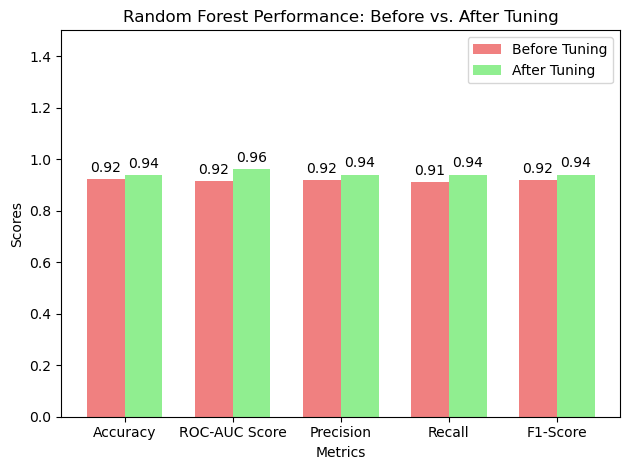

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Data for metrics (Replace these with your actual values)
metrics = ['Accuracy', 'ROC-AUC Score', 'Precision', 'Recall', 'F1-Score']

# Random Forest metrics before tuning
before_tuning = [0.921875, 0.915625, 0.92, 0.91, 0.92]  # Weighted avg of precision, recall, F1-score

# Random Forest metrics after tuning
after_tuning = [0.9382716049382716, 0.961916461916462, 0.94, 0.94, 0.94]  # Weighted avg of precision, recall, F1-score

# X-axis locations for the groups
x = np.arange(len(metrics))

# Width of the bars
width = 0.35  

# Create the plot
fig, ax = plt.subplots()

# Bar for before tuning
bars1 = ax.bar(x - width/2, before_tuning, width, label='Before Tuning', color='lightcoral')

# Bar for after tuning
bars2 = ax.bar(x + width/2, after_tuning, width, label='After Tuning', color='lightgreen')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Random Forest Performance: Before vs. After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1.5)

# Function to add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label by 3 units
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to bars
add_labels(bars1)
add_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()


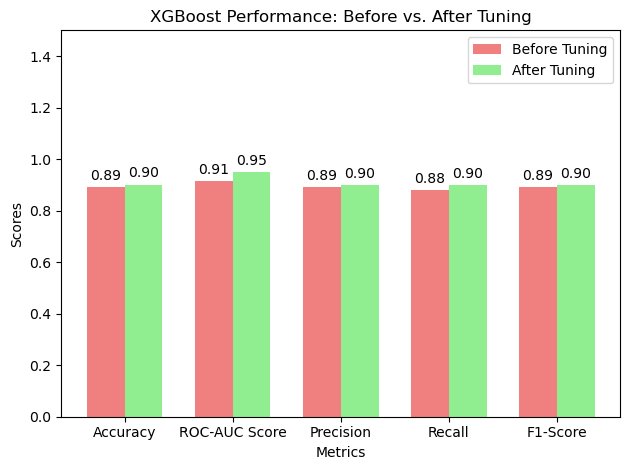

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Data for XGBoost metrics (Replace these with your actual values)
metrics = ['Accuracy', 'ROC-AUC Score', 'Precision', 'Recall', 'F1-Score']

# XGBoost metrics before tuning
before_tuning = [0.890625, 0.9140625, 0.89, 0.88, 0.89]  # Weighted avg of precision, recall, F1-score

# XGBoost metrics after tuning
after_tuning = [0.9012345679012346, 0.949017199017199, 0.90, 0.90, 0.90]  # Weighted avg of precision, recall, F1-score

# X-axis locations for the groups
x = np.arange(len(metrics))

# Width of the bars
width = 0.35  

# Create the plot
fig, ax = plt.subplots()

# Bar for before tuning
bars1 = ax.bar(x - width/2, before_tuning, width, label='Before Tuning', color='lightcoral')

# Bar for after tuning
bars2 = ax.bar(x + width/2, after_tuning, width, label='After Tuning', color='lightgreen')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('XGBoost Performance: Before vs. After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Set y-axis limits
ax.set_ylim(0, 1.5)  # Set the y-axis limit from 0 to 2

# Function to add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label by 3 units
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to bars
add_labels(bars1)
add_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()


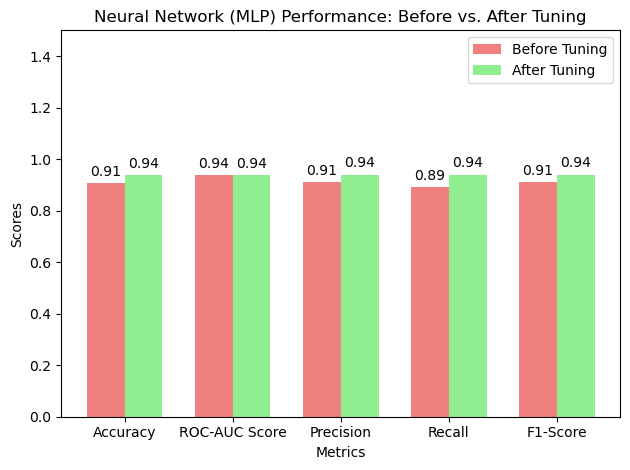

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Neural Network metrics (Replace these with your actual values)
metrics = ['Accuracy', 'ROC-AUC Score', 'Precision', 'Recall', 'F1-Score']

# Neural Network metrics before tuning
before_tuning = [0.90625, 0.9395833333333333, 0.91, 0.89, 0.91]  # Weighted avg of precision, recall, F1-score

# Neural Network metrics after tuning
after_tuning = [0.9382716049382716, 0.9379606879606879, 0.94, 0.94, 0.94]  # Weighted avg of precision, recall, F1-score

# X-axis locations for the groups
x = np.arange(len(metrics))

# Width of the bars
width = 0.35  

# Create the plot
fig, ax = plt.subplots()

# Bar for before tuning
bars1 = ax.bar(x - width/2, before_tuning, width, label='Before Tuning', color='lightcoral')

# Bar for after tuning
bars2 = ax.bar(x + width/2, after_tuning, width, label='After Tuning', color='lightgreen')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Neural Network (MLP) Performance: Before vs. After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Set y-axis limits
ax.set_ylim(0, 1.5)  # Set the y-axis limit from 0 to 2

# Function to add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label by 3 units
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to bars
add_labels(bars1)
add_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()


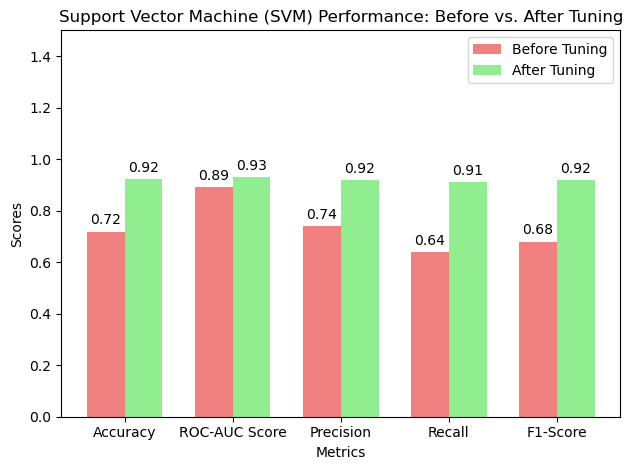

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Data for SVM metrics (Replace these with your actual values)
metrics = ['Accuracy', 'ROC-AUC Score', 'Precision', 'Recall', 'F1-Score']

# SVM metrics before tuning
before_tuning = [0.71875, 0.890625, 0.74, 0.64, 0.68]  # Weighted avg of precision, recall, F1-score

# SVM metrics after tuning
after_tuning = [0.921875, 0.9302083333333333, 0.92, 0.91, 0.92]  # Weighted avg of precision, recall, F1-score

# X-axis locations for the groups
x = np.arange(len(metrics))

# Width of the bars
width = 0.35  

# Create the plot
fig, ax = plt.subplots()

# Bar for before tuning
bars1 = ax.bar(x - width/2, before_tuning, width, label='Before Tuning', color='lightcoral')

# Bar for after tuning
bars2 = ax.bar(x + width/2, after_tuning, width, label='After Tuning', color='lightgreen')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Support Vector Machine (SVM) Performance: Before vs. After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Set y-axis limits
ax.set_ylim(0, 1.5)  # Set the y-axis limit from 0 to 2

# Function to add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label by 3 units
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to bars
add_labels(bars1)
add_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()
